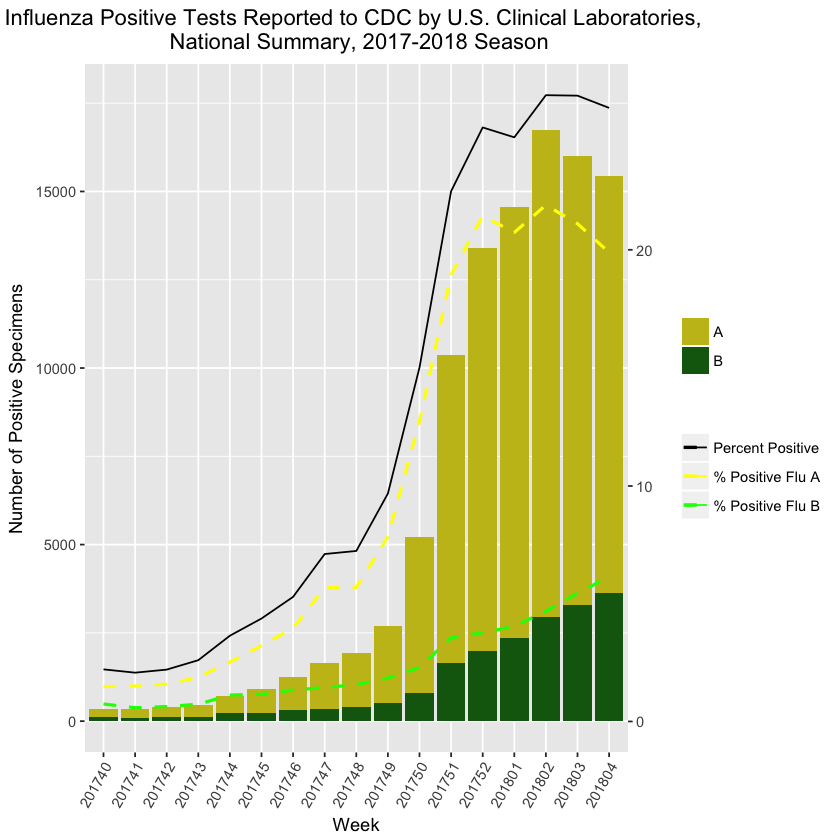

In [2]:
####### Part 2 Graph 1 #######

library(ggplot2)
library(reshape2) 
data1<-read.table("Graph1.txt", header=T)

# Melting the total A and total B data to display in bars together
data1 <- melt(data1, 
              id.vars = c("Week", "Positive_A_percent", "Positive_B_percent", "Total_Tested", "Tot_Positive_percent"), 
              measure.vars = c("Total_A", "Total_B"))

#head(data1)

# Calculating ratio of secondary axis in respect of primary 
sec_axis_ratio <- (20000/30)

# Generating gg plot
ggplot(data1, aes(fill=variable, y=value, x=factor(Week))) + 
  geom_bar( stat="identity")+
  scale_fill_manual(name = '', guide = 'legend',labels = c('A', 'B'), values = c("#c6be1d",  "#116612")) +
  labs(x = "Week", y="Number of Positive Specimens") +
  scale_y_continuous(sec.axis = sec_axis(~./sec_axis_ratio)) +
  geom_line(aes(y=Tot_Positive_percent*sec_axis_ratio, group="1", colour = "Percent Positive")) +
  geom_line(aes(y=Positive_A_percent*sec_axis_ratio, group="1", colour = "% Positive Flu A"), linetype="dashed", size=0.9)+
  geom_line(aes(y=Positive_B_percent*sec_axis_ratio, group="1", colour = "% Positive Flu B"), linetype="dashed", size=0.9)+
  scale_colour_manual("",  breaks = c("Percent Positive", "% Positive Flu A", "% Positive Flu B"), values = c("yellow", "green", "black")) +
  theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \n National Summary, 2017-2018 Season") +
  theme(plot.title = element_text(hjust = 0.5))

# References : 
# https://stackoverflow.com/questions/10349206/add-legend-to-ggplot2-line-plot

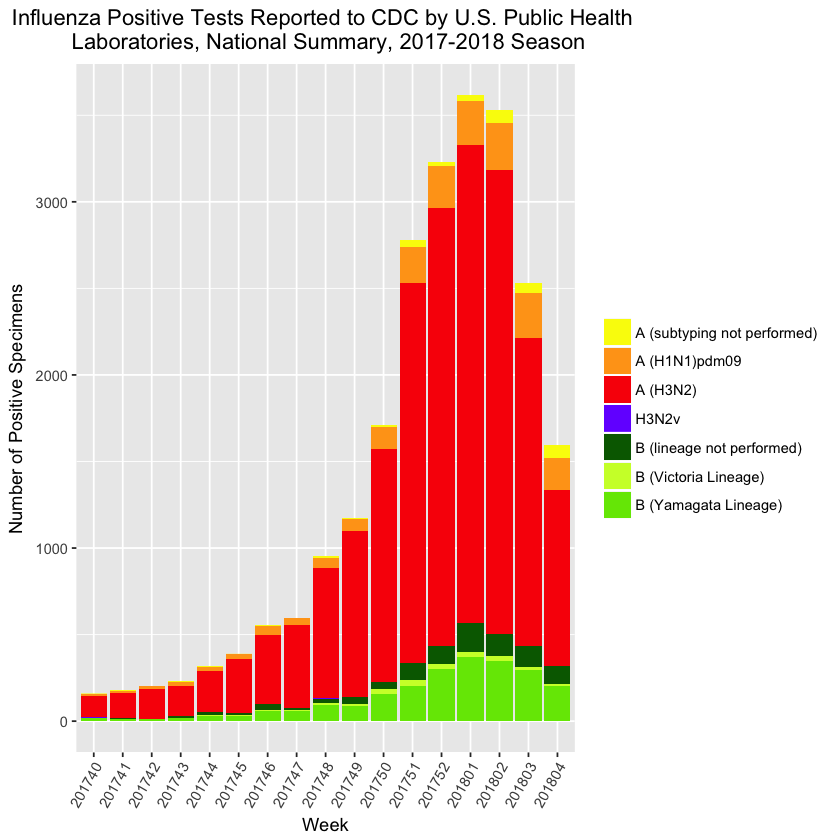

In [120]:
######## Part 2 Graph 2 #########

library(ggplot2)
library(reshape2) 
data2<-read.table("Graph2.txt", header=T)
#data1

# Melting variables to show in single bar plot
data2 <- melt(data2,  id.vars = c("Week", "A_subtyping_not_performed", "A_H1N1", "A_H3", "A_H3N2v", "B", "B_VIC", "B_YAM"), 
              measure.vars = c("A_subtyping_not_performed", "A_H1N1", "A_H3", "A_H3N2v", "B", "B_VIC", "B_YAM"))

#head(data2)

# Generating gg plot
ggplot(data2, aes(fill=variable, y=value, x=factor(Week))) + 
  geom_bar( stat="identity") +
  labs(x = "Week", y="Number of Positive Specimens") +
  scale_fill_manual(name = '', guide = 'legend',labels = c('A (subtyping not performed)', 'A (H1N1)pdm09', 'A (H3N2)',
                                                           'H3N2v', 'B (lineage not performed)', 'B (Victoria Lineage)', 
                                                           'B (Yamagata Lineage)'), 
                    values = c("#f9f906", "#ffa31a", "#f90606", "#751aff", "#006600", "#ccff33", "#73e600")) +
  theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health \n Laboratories, National Summary, 2017-2018 Season") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 68 rows containing missing values (position_stack).”

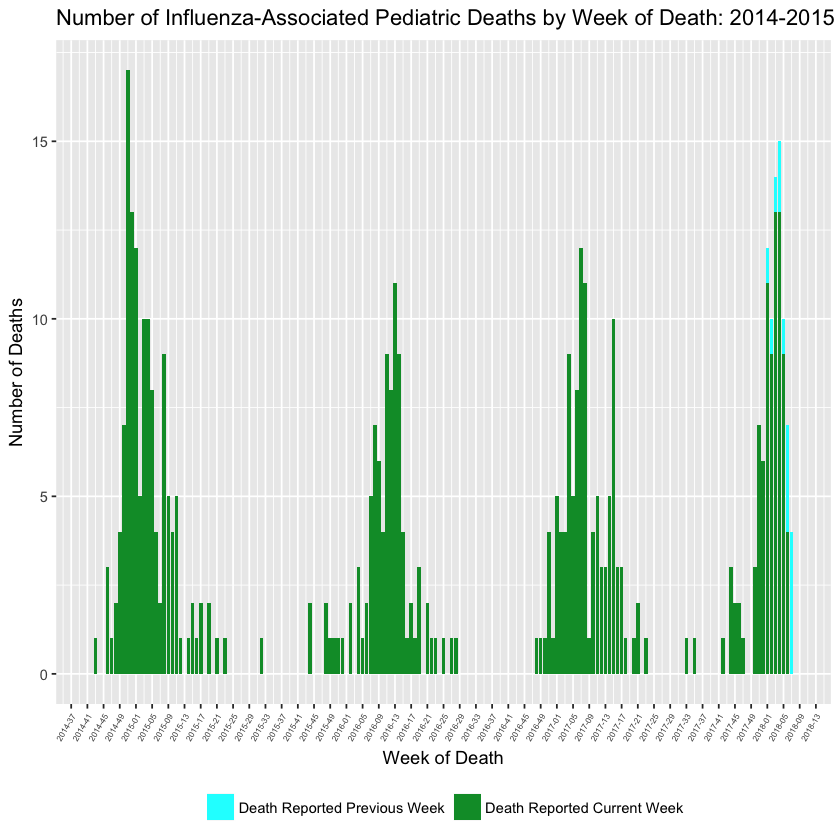

In [121]:
########## Part 2 Graph 3 ###########

library(ggplot2)
library(reshape2)
library(scales)
data4 <- read.csv("Graph3.csv")

# Melting the current and previous week deaths together to show together in bar plot
data4 <- melt(data4, id.vars = c("WEEK.NUMBER"), 
              measure.vars = c("CURRENT.WEEK.DEATHS", "PREVIOUS.WEEKS.DEATHS"))

# Creating a date formatted variable for scaling
data4$week_date <- as.Date(paste(data4$WEEK.NUMBER, 1, sep="-"), format="%Y-%W-%w")

#head(data4)

# Generating ggplot
ggplot(data4, aes(fill=variable, y=value, x=week_date), color="black") + 
  geom_bar( stat="identity") +
  labs(x = "Week of Death", y="Number of Deaths") +
  scale_fill_manual(name = '', guide = 'legend', labels = c('Death Reported Previous Week', 'Death Reported Current Week'), values = c( "#00ffff","#009933")) +
  scale_x_date(breaks = date_breaks("4 weeks"), labels = date_format("%Y-%W"), limits = as.Date(c('2014-10-20','2018-02-19')))+
  theme(legend.position='bottom') + 
  theme( axis.text.x = element_text(angle = 60, hjust = 1, size =5)) +
  ggtitle("Number of Influenza-Associated Pediatric Deaths by Week of Death: 2014-2015 season to present")

# References : 
#https://stackoverflow.com/questions/49135510/error-invalid-input-date-trans-works-with-objects-of-class-date-only-while-t/49136716?noredirect=1#comment85316893_49136716
#https://stackoverflow.com/questions/14162829/set-date-range-in-ggplot


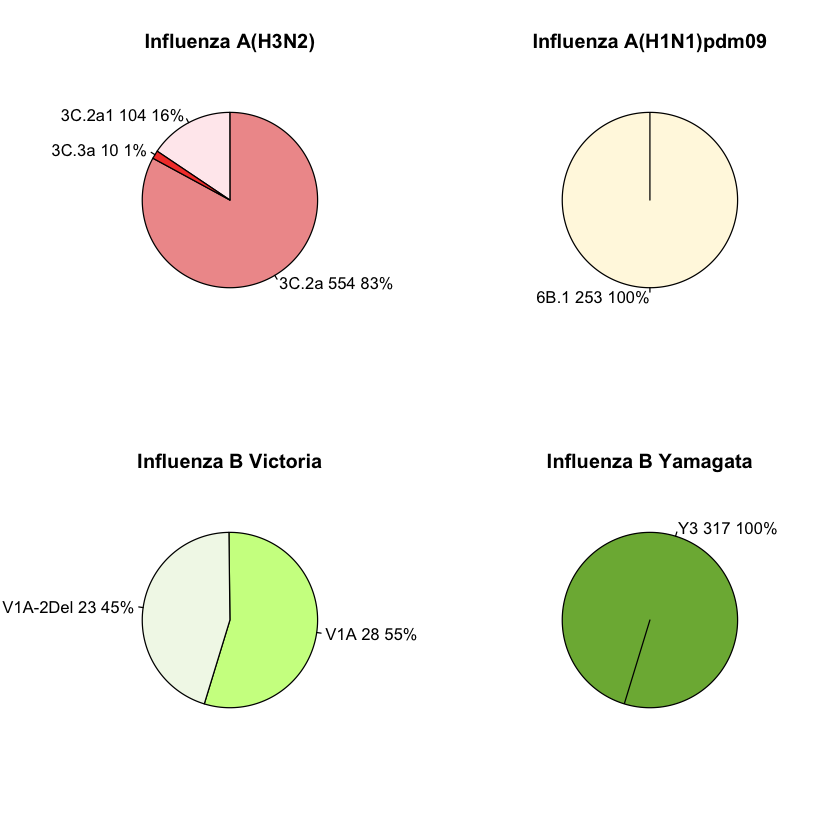

In [7]:
####### Part 2 Graph 4 #############

#Source: https://www.statmethods.net/graphs/pie.html
#Here we first divide the screen into four parts like a matrix of 2X2
par(mfrow = c(2,2))

#Genetic04.csv contains the data for the pie charts to be drawn
piecharts<-read.csv(file = "Genetic04.csv", header=T) 
#piecharts

#Creating the dataframe of the data obtained from the csv file
piechartsdf <- as.data.frame(piecharts)
#piechartsdf

#Reducing the data in order to plot the required data
pieh3df <- piechartsdf[((piechartsdf$X.Sub.type == "H3") & (piechartsdf$Number != 0)),]
#pieh3df

#Plot PieChart1
lbls <- c("3C.2a 554", "3C.2a1 104", "3C.3a 10")
pct <- round(pieh3df$Number/sum(pieh3df$Number)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
colors = c("#EF9A9A", "#FFEBEE", "#F44336")

pie(pieh3df$Number,labels = lbls, col=colors, init.angle=151.5, main="Influenza A(H3N2)")

#Reducing the data in order to plot the required data
pieh1df <- piechartsdf[((piechartsdf$X.Sub.type == "H1pdm09") & (piechartsdf$Number != 0)),]
#pieh1df

#Plot PieChart2
lbls <- c("6B.1 253", "6B 0", "6B.2 0")
pct <- round(pieh1df$Number/sum(pieh1df$Number)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
colors = c("#FFF8E1", "#FFEBEE", "#F44336")

pie(pieh1df$Number,labels = lbls, col=colors, init.angle=90, main="Influenza A(H1N1)pdm09")

#Reducing the data in order to plot the required data
piebvdf <- piechartsdf[((piechartsdf$X.Sub.type == "B/Victoria") & (piechartsdf$Number != 0)),]
#piebvdf

#Plot PieChart3
lbls <- c("V1A 28", "V1A-2Del 23")
pct <- round(piebvdf$Number/sum(piebvdf$Number)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
colors = c("#CCFF90", "#F1F8E9")

pie(piebvdf$Number,labels = lbls, col=colors, init.angle=-107, main="Influenza B Victoria")

#Reducing the data in order to plot the required data
piebydf <- piechartsdf[((piechartsdf$X.Sub.type == "B/Yamagata") & (piechartsdf$Number != 0)),]
#piebydf

#Plot PieChart4
lbls <- c("Y3 317")
pct <- round(piebydf$Number/sum(piebydf$Number)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
colors = c("#7CB342")

pie(piebydf$Number,labels = lbls, col=colors, init.angle=-107, main="Influenza B Yamagata")



NULL

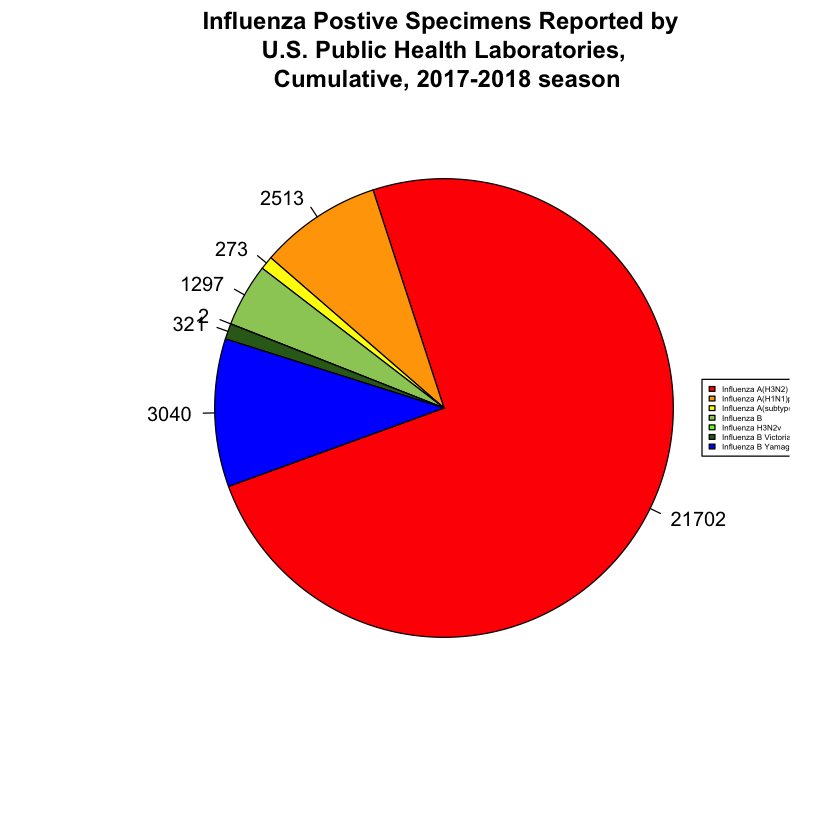

In [4]:
#Source: https://www.statmethods.net/graphs/pie.html

#Plot PieChart5
piechartInfPos <- read.csv(file = "FluView_StackedColumnChart_Data.csv", header=T)
#head(piechartInfPos)

piechartInfPosdf <- data.frame(
  frames = c(colnames(piechartInfPos)[4], colnames(piechartInfPos)[5],colnames(piechartInfPos)[6],colnames(piechartInfPos)[7],
           colnames(piechartInfPos)[8],colnames(piechartInfPos)[9],colnames(piechartInfPos)[10]),
  summation = c(sum(piechartInfPos$A..H3.), sum(piechartInfPos$A..2009.H1N1.), sum(piechartInfPos$A..Subtyping.not.Performed.),sum(piechartInfPos$B),sum(piechartInfPos$H3N2v),
           sum(piechartInfPos$BVic),sum(piechartInfPos$BYam)))



lbls <- piechartInfPosdf$summation
pct <- round(piechartInfPosdf$summation/sum(piechartInfPosdf$summation)*100)
lbls <- paste(lbls) # add percents to labels 
#lbls <- paste(lbls,"%",sep="") # ad % to labels 
colors = c("red", "orange", "yellow", "#9CCC65", "#76FF03", "#33691E", "blue")

pie(piechartInfPosdf$summation,labels = lbls, col=colors, init.angle=200, main="Influenza Postive Specimens Reported by \n U.S. Public Health Laboratories, \n Cumulative, 2017-2018 season") +
theme(plot.title = element_text(hjust = 0.5))

legend(.9, .1, c("Influenza A(H3N2)","Influenza A(H1N1)pdm09","Influenza A(subtype unknown)", "Influenza B", "Influenza H3N2v", "Influenza B Victoria", "Influenza B Yamagata"), cex=0.4, fill=colors)


In [8]:
########## Part 2 Graph 5 ############

#Converting names of states to lower case characters
heatMapData <- read.csv(file="FluHeatMapData.csv",head=TRUE,sep=",")
heatMapDatadf <- as.data.frame(heatMapData)
heatMapDatadf$lowerStateNames <- tolower(heatMapDatadf$STATENAME)
#heatMapDatadf

In [9]:
#Source: http://stackoverflow.com/questions/8751497/latitude-longitude-coordinates-to-state-code-in-r

# The single argument to this function, pointsDF, is a data.frame in which:
#   - column 1 contains the longitude in degrees (negative in the US)
#   - column 2 contains the latitude in degrees

latlong2state <- function(pointsDF) {
    # Prepare SpatialPolygons object with one SpatialPolygon
    # per state (plus DC, minus HI & AK)
    states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
    IDs <- sapply(strsplit(states$names, ":"), function(x) x[1])
    states_sp <- map2SpatialPolygons(states, IDs=IDs,
                     proj4string=CRS("+proj=longlat +datum=WGS84"))

    # Convert pointsDF to a SpatialPoints object 
    pointsSP <- SpatialPoints(pointsDF, 
                    proj4string=CRS("+proj=longlat +datum=WGS84"))

    # Use 'over' to get _indices_ of the Polygons object containing each point 
    indices <- over(pointsSP, states_sp)

    # Return the state names of the Polygons object containing each point
    stateNames <- sapply(states_sp@polygons, function(x) x@ID)
    stateNames[indices]
}

Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


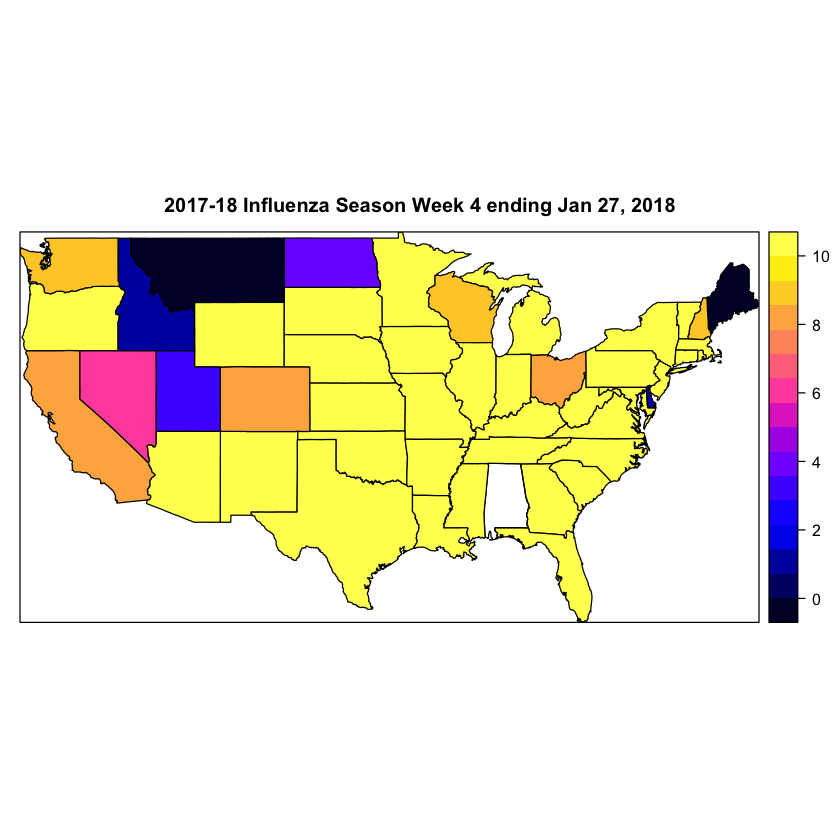

In [10]:
library("ggmap") 
library(maps)
library(maptools)
library(sp)
library(lattice)


mapUSA <- map('state',  fill = TRUE,  plot = FALSE)
nms <- sapply(strsplit(mapUSA$names,  ':'),  function(x)x[1])
USApolygons <- map2SpatialPolygons(mapUSA,  IDs = nms,  CRS('+proj=longlat'))
    
idx <- match(unique(nms),  heatMapDatadf$lowerStateNames)
dat2 <- data.frame(value = heatMapDatadf$LEVEL[idx], state = unique(nms))
row.names(dat2) <- unique(nms)

USAsp <- SpatialPolygonsDataFrame(USApolygons,  data = dat2)


spplot(USAsp['value'], main=list(label="2017-18 Influenza Season Week 4 ending Jan 27, 2018",cex=1, bty='n', title.adj=0.15))